<a href="https://colab.research.google.com/github/MuneefMumthas/CO653-TEAM-EM/blob/main/CO653-TEAM-EM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CO653 - Learning Machines and Intelligent Agents

Team mates:

Muneef - 22206529

Entwan - 22135347


In [1]:
#Importing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.utils import resample
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv('/content/drive/MyDrive/Loan_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Loan_test.csv')

train = pd.DataFrame(train)
test = pd.DataFrame(test)

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train.shape

(614, 13)

In [6]:
test.shape

(367, 12)

In [7]:
train.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [8]:
test.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,int64
LoanAmount,float64
Loan_Amount_Term,float64


###Checking the missing values

In [9]:
# Calculate the percentage of missing values per column
missing_percentage = train.isnull().mean() * 100

# Display columns with more than 0% missing values
print(missing_percentage[missing_percentage > 0])

Gender              2.117264
Married             0.488599
Dependents          2.442997
Self_Employed       5.211726
LoanAmount          3.583062
Loan_Amount_Term    2.280130
Credit_History      8.143322
dtype: float64


In [10]:
# Calculate the percentage of missing values per column
missing_percentage = test.isnull().mean() * 100

# Display columns with more than 0% missing values
print(missing_percentage[missing_percentage > 0])

Gender              2.997275
Dependents          2.724796
Self_Employed       6.267030
LoanAmount          1.362398
Loan_Amount_Term    1.634877
Credit_History      7.901907
dtype: float64


In [11]:
missing = train[train.isnull().any(axis=1)]
missing

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,LP002933,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,Y
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y


In [12]:
def handle_missing_values(data, threshold=0.5):
    """
    Handles missing values in a dataset:
    - Drops columns with more than a specified threshold of missing values.
    - Fills remaining missing values with median for numeric columns and mode for categorical columns.

    Parameters:
        data (pd.DataFrame): The input dataset.
        threshold (float): The proportion of missing values above which columns are dropped (default 0.5).

    Returns:
        pd.DataFrame: The cleaned dataset.
    """
    # Step 2: Fill numeric columns with median
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_columns:
        if data[col].isnull().sum() > 0:  # Only fill if there are missing values
            data[col] = data[col].fillna(data[col].median())

    # Step 3: Fill categorical columns with mode
    categorical_columns = data.select_dtypes(include=['object', 'category']).columns
    for col in categorical_columns:
        if data[col].isnull().sum() > 0:  # Only fill if there are missing values
            data[col] = data[col].fillna(data[col].mode()[0])  # Use the most frequent value

    return data

# Example usage
train = handle_missing_values(train, threshold=0.5)

# Check the result
print(train.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [13]:
# Example usage
test = handle_missing_values(test, threshold=0.5)

# Check the result
print(train.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [14]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [15]:
train = train.drop("Loan_ID", axis = 1)

In [16]:
test = test.drop("Loan_ID", axis = 1)

In [17]:
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['TotalIncome'] = test['ApplicantIncome'] + test['CoapplicantIncome']

In [18]:
train['Loan_Income_Ratio'] = train['LoanAmount'] / (train['TotalIncome'] + 1)
test['Loan_Income_Ratio'] = test['LoanAmount'] / (test['TotalIncome'] + 1)

In [19]:
train['Credit_History'] = train['Credit_History'].fillna(0)
test['Credit_History'] = test['Credit_History'].fillna(0)

In [20]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Loan_Income_Ratio
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,0.021880
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,0.021011
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,0.021993
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,0.024282
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,0.023496


In [21]:
a = train['Property_Area'].unique()
print(sorted(a))

['Rural', 'Semiurban', 'Urban']


In [23]:
unique = train['Dependents'].unique()
print(sorted(unique))

['0', '1', '2', '3+']


In [24]:
unique = train['Education'].unique()
print(sorted(unique))

['Graduate', 'Not Graduate']


In [25]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.3 MB/s eta 0:00:00


In [26]:
import category_encoders as ce

encoder_mestimate = ce.MEstimateEncoder(cols=['Gender', 'Married', 'Property_Area', 'Education', 'Self_Employed'], m=5)

# Encode features only
train_features_encoded = encoder_mestimate.fit_transform(train.drop(columns=['Loan_Status']), train['Loan_Status'])

# Add target column back
train_encoded = train_features_encoded.copy()
train_encoded['Loan_Status'] = train['Loan_Status'].values
# Transform test features (without target variable)

test_encoded = encoder_mestimate.transform(test)

In [27]:
train_encoded.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Loan_Income_Ratio,Loan_Status
0,0.691196,0.630443,0,0.708116,0.687964,5849,0.0,128.0,360.0,1.0,0.659113,5849.0,0.021880,Y
1,0.691196,0.717824,1,0.708116,0.687964,4583,1508.0,128.0,360.0,1.0,0.616503,6091.0,0.021011,N
2,0.691196,0.717824,0,0.708116,0.683178,3000,0.0,66.0,360.0,1.0,0.659113,3000.0,0.021993,Y
3,0.691196,0.717824,0,0.614651,0.687964,2583,2358.0,120.0,360.0,1.0,0.659113,4941.0,0.024282,Y
4,0.691196,0.630443,0,0.708116,0.687964,6000,0.0,141.0,360.0,1.0,0.659113,6000.0,0.023496,Y


In [28]:
from sklearn.preprocessing import MinMaxScaler
# Define the columns to scale
columns_to_scale = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'TotalIncome', 'Loan_Amount_Term']
# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
train_encoded[columns_to_scale] = scaler.fit_transform(train_encoded[columns_to_scale])
test_encoded[columns_to_scale] = scaler.transform(test_encoded[columns_to_scale])  # Use the same scaler for test data


In [29]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder_onehot = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid multicollinearity

# Fit and transform the 'Dependents' column
dependents_encoded = encoder_onehot.fit_transform(train_encoded[['Dependents']])

# Convert to DataFrame with meaningful column names
dependents_df = pd.DataFrame(dependents_encoded, columns=encoder_onehot.get_feature_names_out(['Dependents']))

# Concatenate the encoded columns back to the original dataset
train = pd.concat([train_encoded.drop(columns=['Dependents']), dependents_df], axis=1)

# Apply the same transformation to test data
dependents_encoded_test = encoder_onehot.transform(test_encoded[['Dependents']])
dependents_df_test = pd.DataFrame(dependents_encoded_test, columns=encoder_onehot.get_feature_names_out(['Dependents']))
test = pd.concat([test_encoded.drop(columns=['Dependents']), dependents_df_test], axis=1)

In [30]:
from sklearn.preprocessing import LabelEncoder

# Initialise the encoder
label_encoder = LabelEncoder()

# Fit and transform Loan_Status
train['Loan_Status'] = label_encoder.fit_transform(train['Loan_Status'])


In [31]:
train.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Loan_Income_Ratio,Loan_Status,Dependents_1,Dependents_2,Dependents_3+
0,0.691196,0.630443,0.708116,0.687964,0.070489,0.000000,0.172214,0.74359,1.0,0.659113,0.055394,0.021880,1,0.0,0.0,0.0
1,0.691196,0.717824,0.708116,0.687964,0.054830,0.036192,0.172214,0.74359,1.0,0.616503,0.058435,0.021011,0,1.0,0.0,0.0
2,0.691196,0.717824,0.708116,0.683178,0.035250,0.000000,0.082489,0.74359,1.0,0.659113,0.019583,0.021993,1,0.0,0.0,0.0
3,0.691196,0.717824,0.614651,0.687964,0.030093,0.056592,0.160637,0.74359,1.0,0.659113,0.043980,0.024282,1,0.0,0.0,0.0
4,0.691196,0.630443,0.708116,0.687964,0.072356,0.000000,0.191027,0.74359,1.0,0.659113,0.057292,0.023496,1,0.0,0.0,0.0


In [32]:
test.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Loan_Income_Ratio,Dependents_1,Dependents_2,Dependents_3+
0,0.691196,0.717824,0.708116,0.687964,0.068893,0.000000,0.146165,0.74359,1.0,0.659113,0.053772,0.019227,0.0,0.0,0.0
1,0.691196,0.717824,0.708116,0.687964,0.036190,0.036000,0.169320,0.74359,1.0,0.659113,0.039393,0.027529,1.0,0.0,0.0
2,0.691196,0.717824,0.708116,0.687964,0.059988,0.043200,0.287988,0.74359,1.0,0.659113,0.067347,0.030584,0.0,1.0,0.0
3,0.691196,0.717824,0.708116,0.687964,0.027087,0.061104,0.131693,0.74359,1.0,0.659113,0.043289,0.020462,0.0,1.0,0.0
4,0.691196,0.630443,0.614651,0.687964,0.038664,0.000000,0.099855,0.74359,1.0,0.659113,0.023052,0.023802,0.0,0.0,0.0


In [ ]:
'ApplicantIncome	CoapplicantIncome	LoanAmount'

sns.boxplot(train["CoapplicantIncome"])

In [ ]:
'ApplicantIncome	CoapplicantIncome	LoanAmount'

sns.boxplot(train["LoanAmount"])

In [ ]:
'ApplicantIncome	CoapplicantIncome	LoanAmount'

sns.boxplot(train["ApplicantIncome"])

In [ ]:
# Plot categorical feature distributions

plt.figure(figsize=(8, 5))
sns.countplot(y=train["Loan_Status"], order=train["Loan_Status"].value_counts().index)
plt.title(f"Distribution of Loan_Status")
plt.xlabel("Count")
plt.ylabel("Loan_Status")
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


####Pairplot

In [ ]:
sns.pairplot(train, hue="Loan_Status")
plt.show()

In my experience:
When I upsample then split into train test, there is a chance of getting overfit because some of the test values are already seen.

But in this we already have the seperate test data we can upsample here.

In [33]:
# Separate majority and minority classes
df_majority = train[train["Loan_Status"] == 1]
df_minority = train[train["Loan_Status"] == 0]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,  # Sample with replacement
                                 n_samples=len(df_majority),  # Match majority class count
                                 random_state=42)  # Ensure reproducibility

# Combine majority class with upsampled minority class
train = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the dataset
train = train.sample(frac=1, random_state=42).reset_index(drop=True)

# Check class distribution after upsampling
print(train["Loan_Status"].value_counts())


# Check class distribution after downsampling
print(train["Loan_Status"].value_counts())


Loan_Status
0    422
1    422
Name: count, dtype: int64
Loan_Status
0    422
1    422
Name: count, dtype: int64


In [34]:
train.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Loan_Income_Ratio,Loan_Status,Dependents_1,Dependents_2,Dependents_3+
0,0.691196,0.717824,0.708116,0.683178,0.017934,0.479996,0.332851,0.743590,1.0,0.659113,0.253375,0.011064,0,0.0,1.0,0.0
1,0.691196,0.717824,0.614651,0.687964,0.040186,0.039360,0.147612,0.358974,1.0,0.659113,0.045212,0.022024,1,1.0,0.0,0.0
2,0.691196,0.717824,0.708116,0.683178,0.031861,0.000000,0.140376,0.743590,0.0,0.766540,0.016139,0.038871,0,0.0,1.0,0.0
3,0.670397,0.630443,0.614651,0.683178,0.045974,0.000000,0.076700,0.743590,1.0,0.766540,0.030481,0.016029,0,1.0,0.0,0.0
4,0.691196,0.717824,0.708116,0.687964,0.019901,0.084983,0.176556,0.743590,1.0,0.766540,0.048493,0.024712,1,0.0,0.0,0.0


In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(y=train["Loan_Status"], order=train["Loan_Status"].value_counts().index)
plt.title(f"Distribution of Loan_Status in upsampled")
plt.xlabel("Count")
plt.ylabel("Loan_Status")
plt.show()

In [35]:
# Assume df is your dataset
X = train.drop(columns=["Loan_Status"])  # Features
y = train["Loan_Status"]  # Target variable

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split dataset (80% training, 20% testing)


# Display the shapes of the training and test sets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((675, 15), (169, 15), (675,), (169,))

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [43]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Make predictions
y_pred = model.predict(X_test)

In [44]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9172

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92        88
           1       0.88      0.96      0.92        81

    accuracy                           0.92       169
   macro avg       0.92      0.92      0.92       169
weighted avg       0.92      0.92      0.92       169




Feature Importance:
              Feature  Importance
8      Credit_History    0.215410
11  Loan_Income_Ratio    0.139885
10        TotalIncome    0.131656
4     ApplicantIncome    0.122984
6          LoanAmount    0.120692
5   CoapplicantIncome    0.080630
9       Property_Area    0.046585
7    Loan_Amount_Term    0.025788
1             Married    0.022998
2           Education    0.022272
12       Dependents_1    0.018114
0              Gender    0.015545
3       Self_Employed    0.013461
14      Dependents_3+    0.012651
13       Dependents_2    0.011329


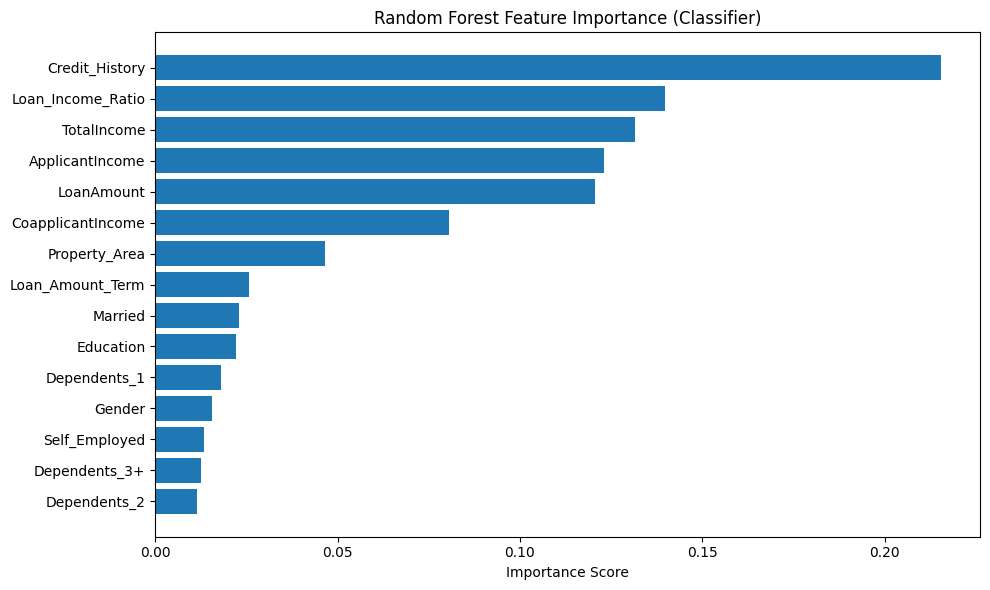

In [45]:
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_df)

#Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Importance Score")
plt.title("Random Forest Feature Importance (Classifier)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [52]:
# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

In [53]:
dt = DecisionTreeClassifier(random_state=42)


In [61]:
# Setup the grid search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit on training data
grid_search.fit(X_train, y_train)

# 3. Evaluate Best Model
best_tree = grid_search.best_estimator_
y_pred = best_tree.predict(X_test)
y_prob = best_tree.predict_proba(X_test)[:, 1]  # Probability of class 1


Fitting 5 folds for each of 378 candidates, totalling 1890 fits


In [62]:
print("Best Parameters:", grid_search.best_params_)
print(f"Cross-Validation Accuracy: {grid_search.best_score_:.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Cross-Validation Accuracy: 0.8578
Test Accuracy: 0.8462

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        88
           1       0.87      0.80      0.83        81

    accuracy                           0.85       169
   macro avg       0.85      0.84      0.85       169
weighted avg       0.85      0.85      0.85       169



In [64]:
from sklearn.tree import export_text

tree_rules = export_text(best_tree, feature_names=list(X.columns))
print(tree_rules)

|--- Credit_History <= 0.50
|   |--- ApplicantIncome <= 0.35
|   |   |--- CoapplicantIncome <= 0.19
|   |   |   |--- TotalIncome <= 0.04
|   |   |   |   |--- class: 0
|   |   |   |--- TotalIncome >  0.04
|   |   |   |   |--- TotalIncome <= 0.04
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- TotalIncome >  0.04
|   |   |   |   |   |--- LoanAmount <= 0.13
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- LoanAmount >  0.13
|   |   |   |   |   |   |--- Dependents_3+ <= 0.50
|   |   |   |   |   |   |   |--- Property_Area <= 0.71
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Property_Area >  0.71
|   |   |   |   |   |   |   |   |--- Dependents_1 <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Dependents_1 >  0.50
|   |   |   |   |   |   |   |   |   |--- ApplicantIncome <= 0.08
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- ApplicantIncome >  0.

In [67]:
def extract_tree_rules_with_nodes(tree, feature_names):
    rules = export_text(tree, feature_names=feature_names).split('\n')
    parsed_rules = []
    current_conditions = []

    for line in rules:
        depth = line.count('|   ')
        content = line.strip().split('|---')[-1].strip()

        # Trim current conditions stack
        current_conditions = current_conditions[:depth]

        if 'class:' in content:
            class_val = int(content.split(':')[-1].strip())
            rule = {
                'conditions': current_conditions.copy(),
                'class': class_val
            }
            parsed_rules.append(rule)
        elif '<=' in content or '>' in content:
            current_conditions.append(content)

    return parsed_rules

In [68]:
# Get the probability from each leaf node
leaf_indices = best_tree.apply(X_test)
probas = best_tree.predict_proba(X_test)

# Map each leaf node index to its average class probability
leaf_probs = {}
for leaf, prob in zip(leaf_indices, probas):
    if leaf not in leaf_probs:
        leaf_probs[leaf] = []
    leaf_probs[leaf].append(prob[1])  # probability of class 1 (approval)

# Average each leaf's probability
leaf_avg_probs = {leaf: np.mean(probs) for leaf, probs in leaf_probs.items()}

In [69]:
def get_fuzzy_class(prob):
    if prob < 0.25:
        return "Most likely to be rejected"
    elif prob < 0.5:
        return "Likely to be rejected"
    elif prob < 0.75:
        return "Likely to be accepted"
    else:
        return "Most likely to be accepted"

In [ ]:
X_train.head()

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1, restore_best_weights=True)

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau


In [ ]:
# Define Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',  # Reduce LR when validation loss stops improving
    factor=0.5,          # Reduce LR by a factor of 0.5
    patience=3,          # Wait for 3 epochs before reducing LR
    min_lr=0.00001       # Minimum LR to prevent over-reduction
)

In [ ]:
X_train.shape[1]

In [ ]:
from tensorflow.keras import backend as K
K.clear_session()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),

    tf.keras.layers.Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    tf.keras.layers.Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    tf.keras.layers.Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  # Reduce LR for better convergence
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train the Model with LR Scheduler
history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_test, y_test),
    callbacks=[mc, early_stopping, lr_scheduler],  # Add lr_scheduler here
    verbose=1
)

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

# Plotting both loss and accuracy in one figure
plt.figure(figsize=(12, 6))

# First subplot for loss
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training Loss', color='blue')
plt.plot(epochs, val_loss, label='Validation Loss', color='green')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Second subplot for accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, label='Training Accuracy', color='red')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='purple')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("best_model.h5")


In [ ]:
# Get model predictions
predictions = model.predict(test, verbose=1)

In [ ]:
# Load test dataset
test_data = pd.read_csv("/content/drive/MyDrive/Loan_test.csv")

# Store Loan_ID separately before dropping
loan_ids = test_data["Loan_ID"].values


In [ ]:
# Convert predictions to 'Y' and 'N'
predicted_classes = np.where(predictions > 0.5, "Y", "N")

# Ensure Loan_IDs and predictions have the same length
assert len(loan_ids) == len(predicted_classes), "Mismatch in Loan_ID and predictions length!"

# Create a DataFrame for submission
submission = pd.DataFrame({
    "Loan_ID": loan_ids,  # Adding back Loan_ID
    "Loan_Status": predicted_classes.flatten()
})

# Save to CSV
submission.to_csv("/content/drive/MyDrive/submission.csv", index=False)

print("Predictions saved as submission.csv")


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns)
print(feature_importance.sort_values(ascending=False))

In [ ]:
model.save("best_model.h5")

In [ ]:
import joblib

# Save encoders
joblib.dump(encoder_mestimate, "mestimate_encoder.pkl")
joblib.dump(scaler, "minmax_scaler.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")
joblib.dump(encoder_onehot, "onehot_encoder.pkl")

In [ ]:
from google.colab import files
files.download("best_model.h5")
files.download("mestimate_encoder.pkl")
files.download("minmax_scaler.pkl")
files.download("label_encoder.pkl")
files.download("onehot_encoder.pkl")